In [70]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math

In [71]:
df = pd.read_csv("D:\hr.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [72]:
left = df[df.left==1]
left.shape
df["promotion_last_5years"].fillna(0)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
14969    0
14970    0
14971    0
14972    0
14973    0
14974    0
14975    0
14976    0
14977    0
14978    0
14979    0
14980    0
14981    0
14982    0
14983    0
14984    0
14985    0
14986    0
14987    0
14988    0
14989    0
14990    0
14991    0
14992    0
14993    0
14994    0
14995    0
14996    0
14997    0
14998    0
Name: promotion_last_5years, Length: 14999, dtype: int64

In [73]:
retained = df[df.left==0]
retained.shape

(11428, 10)

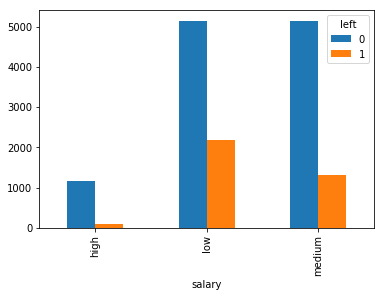

In [74]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [75]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [76]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [77]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [78]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [79]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [80]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [81]:
y = df.left

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# LOGISTIC REGRESSION #

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [84]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [85]:
lr.score(X_test,y_test)

0.7721904761904762

In [86]:
y_predicted=lr.predict(X_test)
from sklearn.metrics import confusion_matrix

In [87]:
cm=confusion_matrix(y_test,y_predicted)

In [88]:
cm

array([[7466,  550],
       [1842,  642]], dtype=int64)

Text(69.0, 0.5, 'truth')

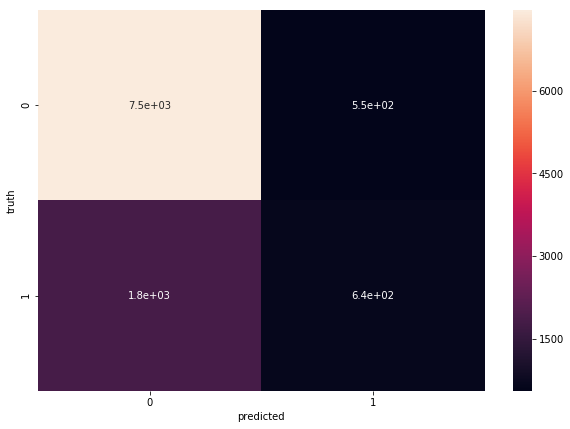

In [89]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [90]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[1842  550] [ 550 1842] [7466  642] [ 642 7466]


In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [92]:
lr_roc_auc=roc_auc_score(y_test,y_predicted)

In [93]:
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(X_test)[:,1])

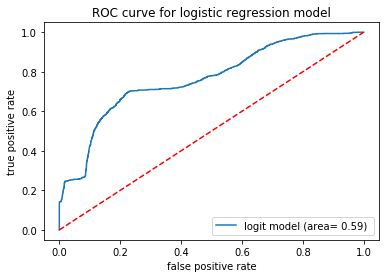

In [94]:
plt.figure()
plt.plot(fpr,tpr,label="logit model (area= %0.2f) "% lr_roc_auc)
plt.plot([0,1],[0,1],'r--')

plt.title("ROC curve for logistic regression model")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [95]:
n=len(FP)

In [96]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[9308, 1192]


In [97]:
d01=pd.DataFrame(FP,columns=['logisticregfp'])
d02=pd.DataFrame(TP,columns=['logisticregtp'])
d=pd.DataFrame(M,columns=['logisticreg'])

# DECISION TREE #

In [98]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [99]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
model.score(X_test,y_test)

0.9042857142857142

In [103]:
y_predicted=model.predict(X_test)

In [104]:
cm=confusion_matrix(y_test,y_predicted)

In [105]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[514 491] [491 514] [7525 1970] [1970 7525]


In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [107]:
dt_roc_auc=roc_auc_score(y_test,y_predicted)

In [108]:
fpr1,tpr1,thresholds1=roc_curve(y_test,model.predict_proba(X_test)[:,1])

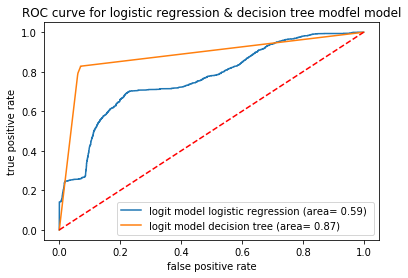

In [109]:
plt.figure()
plt.plot(fpr,tpr,label="logit model logistic regression (area= %0.2f) "% lr_roc_auc)
plt.plot(fpr1,tpr1,label="logit model decision tree (area= %0.2f) "% dt_roc_auc)
plt.plot([0,1],[0,1],'r--')

plt.title("ROC curve for logistic regression & decision tree modfel model")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [110]:
n=len(FP)

In [111]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[8039, 2461]


In [112]:
d1=pd.DataFrame(M,columns=['decisiontree'])
d11=pd.DataFrame(FP,columns=['decisiontreefp'])
d12=pd.DataFrame(TP,columns=['decisiontreetp'])

# KNN(7) #

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn=KNeighborsClassifier(n_neighbors=9)

In [115]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [116]:
knn.score(X_test,y_test)

0.8357142857142857

In [117]:
y_predicted=knn.predict(X_test)

In [118]:
cm=confusion_matrix(y_test,y_predicted)

In [119]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[1065  660] [ 660 1065] [7356 1419] [1419 7356]


In [120]:
knn_roc_auc=roc_auc_score(y_test,y_predicted)

In [121]:
fpr2,tpr2,thresholds2=roc_curve(y_test,knn.predict_proba(X_test)[:,1])

In [122]:
n=len(FP)

In [123]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[8421, 2079]


In [124]:
d2=pd.DataFrame(M,columns=['knn'])
d21=pd.DataFrame(FP,columns=['knnfp'])
d22=pd.DataFrame(TP,columns=['knntp'])

# RANDOM FOREST #

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model=RandomForestClassifier(n_estimators=35)

In [127]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
y_predicted=model.predict(X_test)

In [129]:
model.score(X_test,y_test)

0.9235238095238095

In [130]:
cm=confusion_matrix(y_test,y_predicted)

In [131]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[477 326] [326 477] [7690 2007] [2007 7690]


In [132]:
rf_roc_auc=roc_auc_score(y_test,y_predicted)

In [133]:
fpr3,tpr3,thresholds3=roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [51]:
n=len(FP)

In [52]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[8087, 2413]


In [53]:
d3=pd.DataFrame(M,columns=['rf'])
d31=pd.DataFrame(FP,columns=['rffp'])
d32=pd.DataFrame(TP,columns=['rftp'])

# SUPPORT VECTOR MACHINE #

In [134]:
from sklearn.svm import SVC

In [135]:
model=SVC(random_state=35)
model.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=35,
  shrinking=True, tol=0.001, verbose=False)

In [136]:
y_predicted=model.predict(X_test)

In [137]:
model.score(X_test,y_test)

0.8317142857142857

In [138]:
cm=confusion_matrix(y_test,y_predicted)

In [139]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[1400  367] [ 367 1400] [7649 1084] [1084 7649]


In [140]:
svm_roc_auc=roc_auc_score(y_test,y_predicted)

In [141]:
fpr4,tpr4,thresholds4=roc_curve(y_test,model.predict_proba(X_test)[:,1])

AttributeError: predict_proba is not available when  probability=False

In [60]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[8974, 1526]


In [61]:
d4=pd.DataFrame(M,columns=['svm'])
d41=pd.DataFrame(FP,columns=['svmfp'])
d42=pd.DataFrame(TP,columns=['svmtp'])

# MLP #

In [142]:
from sklearn.neural_network import MLPClassifier

In [143]:
mlp=MLPClassifier(random_state=37)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=37, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [144]:
mlp.score(X_train,y_train)

0.7903978661924872

In [145]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [146]:
mlp.score(X_test_scaled,y_test)

0.8988571428571429

In [147]:
y_predicted=mlp.predict(X_test)

In [148]:
cm=confusion_matrix(y_test,y_predicted)

In [149]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[2484    0] [   0 2484] [8016    0] [   0 8016]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [150]:
mlp_roc_auc=roc_auc_score(y_test,y_predicted)

In [152]:
fpr4,tpr4,thresholds4=roc_curve(y_test,mlp.predict_proba(X_test)[:,1])

In [70]:
n=len(FP)

In [71]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[10500, 0]


In [72]:
d5=pd.DataFrame(M,columns=['mlp'])
d51=pd.DataFrame(FP,columns=['mlpfp'])
d52=pd.DataFrame(TP,columns=['mlptp'])

# NAIVE BAYES

In [153]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [154]:
bnb=BernoulliNB(binarize=0.1)
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)

0.7997142857142857

In [155]:
y_predicted=bnb.predict(X_test)

In [156]:
cm=confusion_matrix(y_test,y_predicted)

In [157]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[2103    0] [   0 2103] [8016  381] [ 381 8016]


In [158]:
bnb_roc_auc=roc_auc_score(y_test,y_predicted)

In [159]:
fpr5,tpr5,thresholds5=roc_curve(y_test,bnb.predict_proba(X_test)[:,1])

In [160]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[10119, 381]


In [161]:
d6=pd.DataFrame(M,columns=['bnb'])
d61=pd.DataFrame(FP,columns=['bnbfp'])
d62=pd.DataFrame(TP,columns=['bnbtp'])
d63=pd.DataFrame(y_predicted,columns=['prd'])

In [162]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)

0.7634285714285715

In [163]:
y_predicted=mnb.predict(X_test)

In [164]:
cm=confusion_matrix(y_test,y_predicted)

In [165]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[2484    0] [   0 2484] [8016    0] [   0 8016]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [166]:
mnb_roc_auc=roc_auc_score(y_test,y_predicted)

In [167]:
fpr6,tpr6,thresholds6=roc_curve(y_test,mnb.predict_proba(X_test)[:,1])

In [84]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[10500, 0]


In [85]:
d7=pd.DataFrame(M,columns=['mnb'])
d71=pd.DataFrame(FP,columns=['mnbfp'])
d72=pd.DataFrame(TP,columns=['mnbtp'])
d73=pd.DataFrame(y_predicted,columns=['prd'])

In [168]:
    gnb=GaussianNB()
    gnb.fit(X_train,y_train)
    gnb.score(X_test,y_test)

0.4635238095238095

In [169]:
y_predicted=gnb.predict(X_test)

In [170]:
cm=confusion_matrix(y_test,y_predicted)

In [171]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[ 262 5371] [5371  262] [2645 2222] [2222 2645]


In [172]:
gnb_roc_auc=roc_auc_score(y_test,y_predicted)

In [173]:
fpr7,tpr7,thresholds7=roc_curve(y_test,gnb.predict_proba(X_test)[:,1])

In [91]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[5802, 4698]


In [92]:
d8=pd.DataFrame(M,columns=['gnb'])
d81=pd.DataFrame(FP,columns=['gnbfp'])
d82=pd.DataFrame(TP,columns=['gnbtp'])
d83=pd.DataFrame(y_predicted,columns=['prd'])

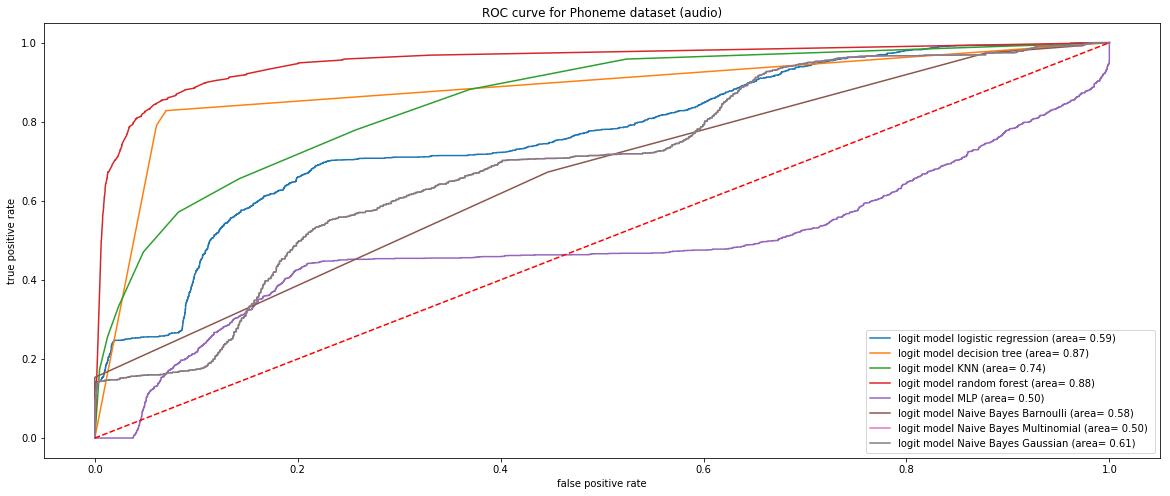

In [184]:
plt.figure(figsize=(20,8))
plt.plot(fpr,tpr,label="logit model logistic regression (area= %0.2f) "% lr_roc_auc)
plt.plot(fpr1,tpr1,label="logit model decision tree (area= %0.2f) "% dt_roc_auc)
plt.plot(fpr2,tpr2,label="logit model KNN (area= %0.2f) "% knn_roc_auc)
plt.plot(fpr3,tpr3,label="logit model random forest (area= %0.2f) "% rf_roc_auc)
plt.plot(fpr4,tpr4,label="logit model MLP (area= %0.2f) "% mlp_roc_auc)
plt.plot(fpr5,tpr5,label="logit model Naive Bayes Barnoulli (area= %0.2f) "% bnb_roc_auc)
plt.plot(fpr6,tpr6,label="logit model Naive Bayes Multinomial (area= %0.2f) "% mnb_roc_auc)
plt.plot(fpr6,tpr6,label="logit model Naive Bayes Gaussian (area= %0.2f) "% gnb_roc_auc)
plt.plot([0,1],[0,1],'r--')

plt.title("ROC curve for Phoneme dataset (audio)")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()